In [205]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [206]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
path = r'/content/drive/MyDrive/AI/EmisiKarbon/'

In [ ]:
%cd '/content/drive/MyDrive/AI/EmisiKarbon/'

# Custom Function

In [209]:
import re

# Fungsi untuk konversi berbagai satuan ke L/100km
def konversi_ke_l_100km(value):
    if pd.isnull(value):  # Cek datanya null atau enggak
        return None # Kalo null, value jadi NaN
    elif isinstance(value, str):
        if 'km/L' in value:
            return round(100 / float(re.search(r'\d+\.*\d*', value).group()), 2)
        elif 'L/10km' in value:
            return round(float(re.search(r'\d+\.*\d*', value).group()) * 10, 2)
        elif 'L/100km' in value:
            return round(float(re.search(r'\d+\.*\d*', value).group()), 2)
        elif 'L/100 km' in value:
            return round(float(re.search(r'\d+\.*\d*', value).group()), 2)
        elif 'km per L' in value:
            return round(100 / float(re.search(r'\d+\.*\d*', value).group()), 2)
        elif 'liters per 100 km' in value:
            return round(float(re.search(r'\d+\.*\d*', value).group()), 2)
        elif 'mpg Imp.' in value:
            return round(282.48 / float(re.search(r'\d+\.*\d*', value).group()), 2)
        elif 'MPG (AS)' in value:
            return round(235.21 / float(re.search(r'\d+\.*\d*', value).group()), 2)
        else:
            return None # Kalo gak ada satuan (string random), value jadi NaN
    else:
        return None # Kalo bukan string dan bukan null, value jadi NaN

# Fungsi untuk ganti string ke float
def string_ke_float(value):
    if pd.isnull(value):  # Cek datanya null atau enggak
        return None # Kalo null, value jadi NaN
    else:
        try:
            nilai_float = float(value) # Coba ubah ke float
            return nilai_float
        except ValueError: # Kalo ada error,
            return None # Value jadi NaN

# Train Data

In [210]:
# Baca dataset yang digunakan untuk melatih model machine learning
df_train = pd.read_csv(path + 'datasets_new/train.csv')
df_train

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,1,MITSU,SUV - SMALL,1.5,4.0,AV8,X,8.40 km/L,0.72 L/10km,0.98 L/10km,208
1,2,TOYOTI,PICKUP TRUCK - SMALL,not-available,6.0,A5,X,7.25 km per L,9.70 L/100km,11.96 L/100km,325
2,3,MATSUDA,COMPACT,2.0,4.0,AS6,X,9.80 km/L,38.70 mpg Imp.,31.76 mpg Imp.,170
3,4,CHEVO,VAN - PASSENGER,unknown,8.0,A6,X,1.73 L/10km,11.70 liters per 100 km,14.78 liters per 100 km,362
4,5,TOYOTI,COMPACT,1.8,4.0,M6,X,8.10 L/100km,35.76 mpg Imp.,8.01 liters per 100 km,180
...,...,...,...,...,...,...,...,...,...,...,...
54932,54933,CHEVO,SUBCOMPACT,6.2,8.0,AS10,Z,11.90 L/100km,11.36 km per L,22.39 MPG (AS),318
54933,54934,CHEVO,SUBCOMPACT,3.6,6.0,M6,X,2.10 L/10km,1.06 L/10km,14.41 MPG (AS),303
54934,54935,FOLD,TWO-SEATER,3.5,6.0,AM7,Z,18.20 L/100km,12.50 L/100km,15.63 L/100 km,410
54935,54936,CHEVO,PICKUP TRUCK - STANDARD,6.2,8.0,A8,Z,18.30 L/100 km,9.90 liters per 100 km,14.52 L/100 km,466


## EDA dan Data Pre-Processing

In [211]:
# Cek tipe data pada dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54937 entries, 0 to 54936
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Id                     54937 non-null  int64 
 1   Make                   54937 non-null  object
 2   Vehicle Class          54398 non-null  object
 3   Engine Size(L)         53544 non-null  object
 4   Cylinders              53739 non-null  object
 5   Transmission           54527 non-null  object
 6   Fuel Type              54391 non-null  object
 7   Fuel Consumption City  53369 non-null  object
 8   Fuel Consumption Hwy   53236 non-null  object
 9   Fuel Consumption Comb  53263 non-null  object
 10  CO2 Emissions(g/km)    54937 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 4.6+ MB


### Engine Size(L)

In [212]:
# Cek value unik di dalam kolom untuk melihat apakah ada data yang tidak wajar
df_train["Engine Size(L)"].unique()

array(['1.5', 'not-available', '2.0', 'unknown', '1.8', '2.4', '3.5',
       '2.7', '1.6', 'na', '1.2', '2.5', '3.2', '5.0', '8.4', '1.4',
       '3.8', 'unestablished', '6.2', nan, '4.4', '3.0', '3.6', '5.7',
       '5.2', '6.4', '2.3', 'not-recorded', '3.3', '5.3', 'missing',
       '6.5', '1.0', '4.0', '3.7', '1.3', 'unspecified', '4.6', '4.8',
       '5.6', '2.8', '6.0', '4.2', '4.3', '2.2', '6.6', '5.4', '3.4',
       '5.8', '6.8'], dtype=object)

In [213]:
# Lakukan konversi menggunakan custom function
df_train["engine_size_l"] = df_train["Engine Size(L)"].apply(string_ke_float)
df_train["engine_size_l"].unique()

array([1.5, nan, 2. , 1.8, 2.4, 3.5, 2.7, 1.6, 1.2, 2.5, 3.2, 5. , 8.4,
       1.4, 3.8, 6.2, 4.4, 3. , 3.6, 5.7, 5.2, 6.4, 2.3, 3.3, 5.3, 6.5,
       1. , 4. , 3.7, 1.3, 4.6, 4.8, 5.6, 2.8, 6. , 4.2, 4.3, 2.2, 6.6,
       5.4, 3.4, 5.8, 6.8])

In [214]:
# Hitung mean-nya dulu
mean_engine_size_l = df_train["engine_size_l"].mean()

# Ganti null values ke mean yang sudah dihitung sebelumnya
df_train["engine_size_l"].fillna(mean_engine_size_l, inplace=True)
df_train.isnull().sum()

Id                          0
Make                        0
Vehicle Class             539
Engine Size(L)           1393
Cylinders                1198
Transmission              410
Fuel Type                 546
Fuel Consumption City    1568
Fuel Consumption Hwy     1701
Fuel Consumption Comb    1674
CO2 Emissions(g/km)         0
engine_size_l               0
dtype: int64

### Cylinder

In [215]:
# Cek value unik di dalam kolom untuk melihat apakah ada data yang tidak wajar
df_train["Cylinders"].unique()

array(['4.0', '6.0', '8.0', 'unknown', 'na', '3.0', '10.0',
       'not-recorded', 'unspecified', '12.0', nan, '5.0', 'missing',
       'not-available', 'unestablished'], dtype=object)

In [216]:
# Lakukan konversi menggunakan custom function
df_train["cylinders"] = df_train["Cylinders"].apply(string_ke_float)
df_train["cylinders"].unique()

array([ 4.,  6.,  8., nan,  3., 10., 12.,  5.])

In [217]:
# Hitung mean-nya dulu
mean_cylinders = df_train["cylinders"].mean()

# Ganti null values ke mean yang sudah dihitung sebelumnya
df_train["cylinders"].fillna(mean_cylinders, inplace=True)
df_train.isnull().sum()

Id                          0
Make                        0
Vehicle Class             539
Engine Size(L)           1393
Cylinders                1198
Transmission              410
Fuel Type                 546
Fuel Consumption City    1568
Fuel Consumption Hwy     1701
Fuel Consumption Comb    1674
CO2 Emissions(g/km)         0
engine_size_l               0
cylinders                   0
dtype: int64

### Fuel Consumption City

In [218]:
# Cek value unik di dalam kolom untuk melihat apakah ada data yang tidak wajar
df_train["Fuel Consumption City"].unique()

array(['8.40 km/L', '7.25 km per L', '9.80 km/L', ...,
       '25.40 liters per 100 km', '24.60 L/100 km',
       '28.80 liters per 100 km'], dtype=object)

In [219]:
# Karena sulit melihat data uniknya, kita perlu melihat sample dari dataset
df_train["Fuel Consumption City"].sample(20)

36369              8.70 km per L
39000    16.10 liters per 100 km
43513               9.80 L/100km
29189             24.14 mpg Imp.
25416             12.30 L/100 km
45086                        NaN
20721              7.19 km per L
3973              17.40 L/100 km
8967               5.56 km per L
13803                  9.52 km/L
17192              14.70 L/100km
22249              14.00 L/100km
45339                  9.52 km/L
11847             12.50 L/100 km
18879                1.10 L/10km
30690             12.05 km per L
35046             21.56 mpg Imp.
38487              9.50 L/100 km
2586                   5.68 km/L
18588                  6.06 km/L
Name: Fuel Consumption City, dtype: object

In [220]:
# Gunakan custom function untuk konversi satu kolom, simpan hasil konversi di kolom baru
df_train["fuel_city_l_100km"] = df_train["Fuel Consumption City"].apply(konversi_ke_l_100km)

In [221]:
# Hitung mean-nya dulu
mean_fuel_city_l_100km = df_train["fuel_city_l_100km"].mean()

# Ganti null values ke mean yang sudah dihitung sebelumnya
df_train["fuel_city_l_100km"].fillna(mean_fuel_city_l_100km, inplace=True)
df_train.isnull().sum()

Id                          0
Make                        0
Vehicle Class             539
Engine Size(L)           1393
Cylinders                1198
Transmission              410
Fuel Type                 546
Fuel Consumption City    1568
Fuel Consumption Hwy     1701
Fuel Consumption Comb    1674
CO2 Emissions(g/km)         0
engine_size_l               0
cylinders                   0
fuel_city_l_100km           0
dtype: int64

In [222]:
# Lakukan pengecekan setelah konversi
df_train["fuel_city_l_100km"].sample(20)

46618     8.90
42269    14.50
43166    10.20
18542    13.60
47233    14.90
33023     9.20
46849    11.40
36000    13.19
3890     16.30
23194    12.70
7028     10.40
33676    22.40
3487     12.40
35406     4.30
16497    14.60
37500     8.70
52887    16.20
44924    10.60
32735    21.50
50108    19.49
Name: fuel_city_l_100km, dtype: float64

### Fuel Consumption Hwy

In [223]:
# Cek value unik di dalam kolom untuk melihat apakah ada data yang tidak wajar
df_train["Fuel Consumption Hwy"].unique()

array(['0.72 L/10km', '9.70 L/100km', '38.70 mpg Imp.', ...,
       '19.30 L/100km', '14.52 MPG (AS)', '15.35 mpg Imp.'], dtype=object)

In [224]:
# Karena sulit melihat data uniknya, kita perlu melihat sample dari dataset
df_train["Fuel Consumption Hwy"].sample(20)

36721            23.52 MPG (AS)
18677            36.22 mpg Imp.
23709             14.20 L/100km
53065                 9.62 km/L
42807               0.83 L/10km
26916            29.12 mpg Imp.
47556    8.80 liters per 100 km
20073            11.80 L/100 km
44703            30.05 mpg Imp.
38055              8.30 L/100km
52979            15.70 L/100 km
6527              5.70 L/100 km
30820             8.40 km per L
46157                14.71 km/L
40868             6.50 L/100 km
24790            16.80 L/100 km
50264             7.69 km per L
41985            22.40 MPG (AS)
35640    8.70 liters per 100 km
35946                       NaN
Name: Fuel Consumption Hwy, dtype: object

In [225]:
# Gunakan custom function untuk konversi satu kolom, simpan hasil konversi di kolom baru
df_train["fuel_hwy_l_100km"] = df_train["Fuel Consumption Hwy"].apply(konversi_ke_l_100km)

In [226]:
# Hitung mean-nya dulu
mean_fuel_hwy_l_100km = df_train["fuel_hwy_l_100km"].mean()

# Ganti null values ke mean yang sudah dihitung sebelumnya
df_train["fuel_hwy_l_100km"].fillna(mean_fuel_hwy_l_100km, inplace=True)
df_train.isnull().sum()

Id                          0
Make                        0
Vehicle Class             539
Engine Size(L)           1393
Cylinders                1198
Transmission              410
Fuel Type                 546
Fuel Consumption City    1568
Fuel Consumption Hwy     1701
Fuel Consumption Comb    1674
CO2 Emissions(g/km)         0
engine_size_l               0
cylinders                   0
fuel_city_l_100km           0
fuel_hwy_l_100km            0
dtype: int64

In [227]:
# Lakukan pengecekan setelah konversi
df_train["fuel_hwy_l_100km"].sample(20)

49619    11.500000
32276     9.144992
22142    10.800000
22641     7.000000
40964    13.100000
47356    11.500000
17847     8.100000
5116     12.590000
1736      8.600000
38919     7.400000
40176     5.000000
45509     8.200000
28616     9.400000
36884     9.600000
44274     6.500000
49261     7.500000
45506     6.400000
11670     9.000000
26615     9.900000
12107     7.700000
Name: fuel_hwy_l_100km, dtype: float64

### Fuel Consumption Comb

In [228]:
# Hitung fuel comb pake rumus: 55% city + 45% highway
df_train['fuel_comb_l_100km'] = round(0.55 * df_train['fuel_city_l_100km'] + 0.45 * df_train['fuel_hwy_l_100km'], 2)
df_train['fuel_comb_l_100km'].sample(20)

26223    10.13
41616    16.18
4355     10.47
32381     8.37
41523    14.40
49835    11.16
24147    10.62
18187    15.24
49035    12.76
50212    13.25
42495    12.49
50281    10.28
25899    13.14
25045     8.51
26539    11.15
15068    20.31
6770     10.82
31997     8.81
43427    13.94
42880    15.91
Name: fuel_comb_l_100km, dtype: float64

In [229]:
# Lakukan pengecekan akhir untuk melihat null values
df_train.isnull().sum()

Id                          0
Make                        0
Vehicle Class             539
Engine Size(L)           1393
Cylinders                1198
Transmission              410
Fuel Type                 546
Fuel Consumption City    1568
Fuel Consumption Hwy     1701
Fuel Consumption Comb    1674
CO2 Emissions(g/km)         0
engine_size_l               0
cylinders                   0
fuel_city_l_100km           0
fuel_hwy_l_100km            0
fuel_comb_l_100km           0
dtype: int64

### CO2 Emissions(g/km)

In [230]:
# Cek value unik di dalam kolom untuk melihat apakah ada data yang tidak wajar
df_train['CO2 Emissions(g/km)'].unique()

array([208, 325, 170, 362, 180, 216, 201, 221, 243, 297, 347, 192, 237,
       235, 198, 219, 225, 167, 232, 305, 187, 263, 257, 178, 367, 406,
       397, 191, 265, 314, 213, 217, 494, 223, 311, 196, 150, 107, 354,
       200, 222, 177, 364, 174, 283, 289, 226, 393, 162, 189, 234, 190,
       320, 126, 342, 337, 209, 139, 371, 173, 304, 295, 267, 356, 262,
       230, 215, 350, 211, 260, 120, 193, 159, 361, 252, 428, 259, 270,
       185, 194, 353, 313, 418, 392, 266, 273, 245, 236, 241, 346, 247,
       106, 274, 164, 195, 157, 214, 197, 358, 229, 312, 165, 188, 253,
       186, 207, 391, 203, 166, 204, 359, 181, 238, 372, 360, 308, 218,
       296, 210, 344, 272, 310, 160, 113, 117, 105, 169, 284, 239, 143,
       168, 287, 212, 301, 315, 271, 179, 172, 268, 279, 161, 176, 231,
       246, 184, 292, 330, 369, 396, 277, 233, 338, 298, 275,  97, 307,
       103, 317, 293, 286, 258, 309, 388, 119, 345, 290, 205, 202, 163,
       324, 306, 302, 436, 220, 334, 373, 242, 261, 138, 224, 13

### Korelasi antara X dan y

In [231]:
# Cek korelasi df_train untuk 6 kolom terakhir saja
df_train.iloc[:, -6:].corr(numeric_only=True)

,CO2 Emissions(g/km),engine_size_l,cylinders,fuel_city_l_100km,fuel_hwy_l_100km,fuel_comb_l_100km
CO2 Emissions(g/km),1.000000,0.797734,0.783917,0.771762,0.709113,0.808556
engine_size_l,0.797734,1.000000,0.855043,0.621204,0.581910,0.654790
cylinders,0.783917,0.855043,1.000000,0.613655,0.577207,0.647680
fuel_city_l_100km,0.771762,0.621204,0.613655,1.000000,0.690230,0.966043
fuel_hwy_l_100km,0.709113,0.581910,0.577207,0.690230,1.000000,0.853753
fuel_comb_l_100km,0.808556,0.654790,0.647680,0.966043,0.853753,1.000000


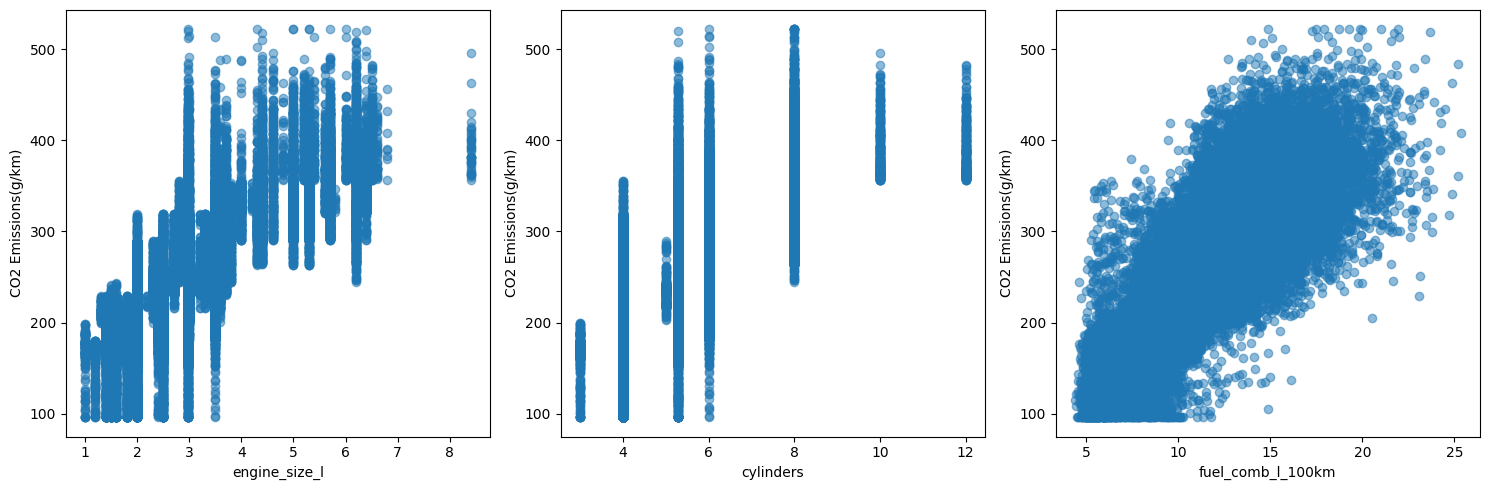

In [232]:
X = df_train[['engine_size_l', 'cylinders', 'fuel_comb_l_100km']]
y = df_train['CO2 Emissions(g/km)']

# Buat scatter plot untuk melihat persebaran datanya
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(X.columns):
    axs[i].scatter(X[col], y, alpha=0.5)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('CO2 Emissions(g/km)')

plt.tight_layout()
plt.show()

## Model dan Prediksi

In [233]:
# Cek sample datanya
df_train.iloc[:, -6:].sample(3)

,CO2 Emissions(g/km),engine_size_l,cylinders,fuel_city_l_100km,fuel_hwy_l_100km,fuel_comb_l_100km
46401,224,1.6,4.0,9.8,8.3,9.12
34741,328,4.4,8.0,23.0,10.7,17.46
36907,271,3.6,6.0,12.8,9.9,11.50


In [234]:
# Tentukan features untuk variabel X
X = df_train[['engine_size_l', 'cylinders', 'fuel_comb_l_100km']]
X

,engine_size_l,cylinders,fuel_comb_l_100km
0,1.500000,4.0,9.78
1,2.978387,6.0,11.95
2,2.000000,4.0,8.90
3,2.978387,8.0,14.78
4,1.800000,4.0,8.01
...,...,...,...
54932,6.200000,8.0,10.50
54933,3.600000,6.0,16.32
54934,3.500000,6.0,15.64
54935,6.200000,8.0,14.52


In [235]:
# Tentukan features yang akan diprediksi
y = df_train['CO2 Emissions(g/km)']
y

0        208
1        325
2        170
3        362
4        180
        ... 
54932    318
54933    303
54934    410
54935    466
54936    192
Name: CO2 Emissions(g/km), Length: 54937, dtype: int64

In [236]:
from sklearn.model_selection import train_test_split

# Split data jadi dua untuk proses training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [237]:
from sklearn.linear_model import LinearRegression

# Inisialisasi dan fit model
model = LinearRegression()
model.fit(X_train, y_train)

# prediksi nilai y
y_pred = model.predict(X_test)

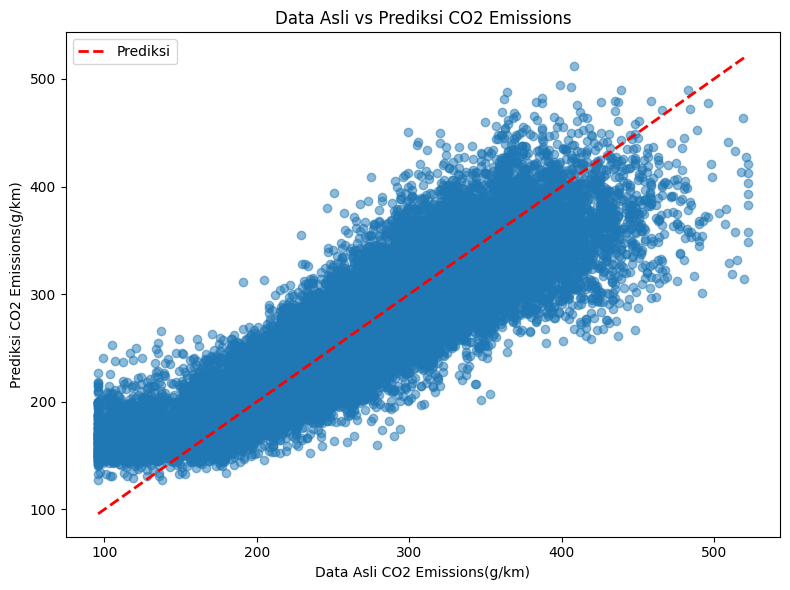

In [238]:
# Plot data asli dan hasil prediksi
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Data Asli CO2 Emissions(g/km)')
plt.ylabel('Prediksi CO2 Emissions(g/km)')
plt.title('Data Asli vs Prediksi CO2 Emissions')

# Garis regresi linear
plt.plot(
    [y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
    color='red',
    linestyle='--',
    lw=2,
    label='Prediksi'
)
plt.legend()
plt.tight_layout()
plt.show()

## Evaluasi

In [239]:
from sklearn.metrics import mean_squared_error

# Kalkulasi RMSE di berdasarkan data test dan prediksi
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 30.74


In [240]:
import pickle

# Simpan model ke dalam pickle
with open('model_reg_linear_mean.pickle', 'wb') as f:
    pickle.dump(model, f)

# Test Data

In [241]:
# Baca dataset yang digunakan untuk proses testing model machine learning
df_test = pd.read_csv(path + 'datasets_new/test.csv')
df_test

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,54938,FOLD,PICKUP TRUCK - STANDARD,5.0,8.0,AS10,X,14.20 liters per 100 km,15.20 liters per 100 km,16.06 MPG (AS)
1,54939,BMV,COMPACT,2.0,4.0,A8,Z,9.10 L/100 km,43.46 mpg Imp.,29.66 MPG (AS)
2,54940,JIPU,SUV - SMALL,1.3,4.0,A9,X,27.69 mpg Imp.,7.80 liters per 100 km,9.12 liters per 100 km
3,54941,LECUS,SUV - SMALL,not-recorded,4.0,AS6,Z,NaN,26.43 MPG (AS),NaN
4,54942,BARUSU,COMPACT,2.0,unestablished,M6,Z,11.36 km/L,39.79 mpg Imp.,8.04 L/100km
...,...,...,...,...,...,...,...,...,...,...
23540,78478,MITSU,SUV - SMALL,2.0,4.0,M5,X,NaN,13.33 km/L,8.98 L/100km
23541,78479,CHEVO,COMPACT,1.4,4.0,M6,X,27.04 MPG (AS),18.18 km per L,0.73 L/10km
23542,78480,KIO,SUV - SMALL,unknown,4.0,AS6,X,11.60 L/100km,8.40 liters per 100 km,9.84 km per L
23543,78481,JIPU,SUV - SMALL,2.4,4.0,A9,X,9.52 km/L,0.84 L/10km,0.96 L/10km


## EDA dan Data Pre-Processing

In [242]:
df_test.isnull().sum()

Id                         0
Make                       0
Vehicle Class            219
Engine Size(L)           632
Cylinders                506
Transmission             163
Fuel Type                221
Fuel Consumption City    684
Fuel Consumption Hwy     721
Fuel Consumption Comb    688
dtype: int64

### Engine Size(L)

In [243]:
# Cek value unik di dalam kolom untuk melihat apakah ada data yang tidak wajar
df_test["Engine Size(L)"].unique()

array(['5.0', '2.0', '1.3', 'not-recorded', '6.2', '1.8', '4.4', '1.6',
       '2.4', '3.0', '1.4', '6.0', '5.2', '3.5', '3.3', 'not-available',
       '2.5', '2.3', nan, '3.2', '3.6', 'unestablished', '3.8', '1.0',
       '4.8', '2.8', '2.7', '5.6', '1.5', '5.3', '5.8', '6.6', 'missing',
       'unknown', '5.7', '6.4', '8.4', '4.6', '5.4', 'na', 'unspecified',
       '3.7', '4.0', '1.2', '4.3', '6.5', '3.4', '6.8', '2.2', '4.2'],
      dtype=object)

In [244]:
# Lakukan konversi menggunakan custom function
df_test["engine_size_l"] = df_test["Engine Size(L)"].apply(string_ke_float)
df_test["engine_size_l"].unique()

array([5. , 2. , 1.3, nan, 6.2, 1.8, 4.4, 1.6, 2.4, 3. , 1.4, 6. , 5.2,
       3.5, 3.3, 2.5, 2.3, 3.2, 3.6, 3.8, 1. , 4.8, 2.8, 2.7, 5.6, 1.5,
       5.3, 5.8, 6.6, 5.7, 6.4, 8.4, 4.6, 5.4, 3.7, 4. , 1.2, 4.3, 6.5,
       3.4, 6.8, 2.2, 4.2])

In [245]:
# Hitung mean-nya dulu
mean_engine_size_l = df_test["engine_size_l"].mean()

# Ganti null values ke mean yang sudah dihitung sebelumnya
df_test["engine_size_l"].fillna(mean_engine_size_l, inplace=True)
df_test.isnull().sum()

Id                         0
Make                       0
Vehicle Class            219
Engine Size(L)           632
Cylinders                506
Transmission             163
Fuel Type                221
Fuel Consumption City    684
Fuel Consumption Hwy     721
Fuel Consumption Comb    688
engine_size_l              0
dtype: int64

### Cylinder

In [246]:
# Cek value unik di dalam kolom untuk melihat apakah ada data yang tidak wajar
df_test["Cylinders"].unique()

array(['8.0', '4.0', 'unestablished', nan, 'unspecified', '10.0', '6.0',
       'missing', '3.0', 'unknown', 'not-available', '12.0', 'na',
       'not-recorded', '5.0'], dtype=object)

In [247]:
# Lakukan konversi menggunakan custom function
df_test["cylinders"] = df_test["Cylinders"].apply(string_ke_float)
df_test["cylinders"].unique()

array([ 8.,  4., nan, 10.,  6.,  3., 12.,  5.])

In [248]:
# Hitung mean-nya dulu
mean_cylinders = df_test["cylinders"].mean()

# Ganti null values ke mean yang sudah dihitung sebelumnya
df_test["cylinders"].fillna(mean_cylinders, inplace=True)
df_test.isnull().sum()

Id                         0
Make                       0
Vehicle Class            219
Engine Size(L)           632
Cylinders                506
Transmission             163
Fuel Type                221
Fuel Consumption City    684
Fuel Consumption Hwy     721
Fuel Consumption Comb    688
engine_size_l              0
cylinders                  0
dtype: int64

### Fuel Consumption City

In [249]:
# Cek value unik di dalam kolom untuk melihat apakah ada data yang tidak wajar
df_test["Fuel Consumption City"].sample(20)

12352              9.40 L/100 km
4392     12.40 liters per 100 km
14619             26.90 mpg Imp.
13444             11.20 L/100 km
2388                 1.00 L/10km
15732              6.37 km per L
4400              28.82 mpg Imp.
20784                        NaN
18992    10.00 liters per 100 km
3983                 1.63 L/10km
15176              5.71 km per L
18661             31.39 mpg Imp.
14790               9.40 L/100km
22248              16.50 L/100km
12232               8.60 L/100km
1843                 0.93 L/10km
16802                1.36 L/10km
4209              15.58 MPG (AS)
6272                  11.11 km/L
7378              16.23 mpg Imp.
Name: Fuel Consumption City, dtype: object

In [250]:
# Gunakan custom function untuk konversi satu kolom, simpan hasil konversi di kolom baru
df_test["fuel_city_l_100km"] = df_test["Fuel Consumption City"].apply(konversi_ke_l_100km)
df_test.isnull().sum()

Id                          0
Make                        0
Vehicle Class             219
Engine Size(L)            632
Cylinders                 506
Transmission              163
Fuel Type                 221
Fuel Consumption City     684
Fuel Consumption Hwy      721
Fuel Consumption Comb     688
engine_size_l               0
cylinders                   0
fuel_city_l_100km        1041
dtype: int64

In [251]:
# Hitung mean-nya dulu
mean_fuel_city_l_100km = df_test["fuel_city_l_100km"].mean()

# Ganti null values ke mean yang sudah dihitung sebelumnya
df_test["fuel_city_l_100km"].fillna(mean_fuel_city_l_100km, inplace=True)
df_test.isnull().sum()

Id                         0
Make                       0
Vehicle Class            219
Engine Size(L)           632
Cylinders                506
Transmission             163
Fuel Type                221
Fuel Consumption City    684
Fuel Consumption Hwy     721
Fuel Consumption Comb    688
engine_size_l              0
cylinders                  0
fuel_city_l_100km          0
dtype: int64

### Fuel Consumption Hwy

In [252]:
# Cek value unik di dalam kolom untuk melihat apakah ada data yang tidak wajar
df_test["Fuel Consumption Hwy"].sample(20)

16928             27.97 mpg Imp.
6587              28.82 mpg Imp.
10789             25.00 mpg Imp.
19864              7.70 L/100 km
8749              16.45 MPG (AS)
1169              28.00 MPG (AS)
15123                0.78 L/10km
6757                 0.90 L/10km
18949              10.60 L/100km
19724                0.90 L/10km
14218             10.42 km per L
1647                   7.81 km/L
7093                  14.29 km/L
18471                  5.38 km/L
13891                 11.24 km/L
11664             26.14 MPG (AS)
12744             10.80 L/100 km
18085              8.77 km per L
4670     15.30 liters per 100 km
20258                 11.36 km/L
Name: Fuel Consumption Hwy, dtype: object

In [253]:
# Gunakan custom function untuk konversi satu kolom, simpan hasil konversi di kolom baru
df_test["fuel_hwy_l_100km"] = df_test["Fuel Consumption Hwy"].apply(konversi_ke_l_100km)
df_test.isnull().sum()

Id                          0
Make                        0
Vehicle Class             219
Engine Size(L)            632
Cylinders                 506
Transmission              163
Fuel Type                 221
Fuel Consumption City     684
Fuel Consumption Hwy      721
Fuel Consumption Comb     688
engine_size_l               0
cylinders                   0
fuel_city_l_100km           0
fuel_hwy_l_100km         1067
dtype: int64

In [254]:
# Hitung mean-nya dulu
mean_fuel_hwy_l_100km = df_test["fuel_hwy_l_100km"].mean()

# Ganti null values ke mean yang sudah dihitung sebelumnya
df_test["fuel_hwy_l_100km"].fillna(mean_fuel_hwy_l_100km, inplace=True)
df_test.isnull().sum()

Id                         0
Make                       0
Vehicle Class            219
Engine Size(L)           632
Cylinders                506
Transmission             163
Fuel Type                221
Fuel Consumption City    684
Fuel Consumption Hwy     721
Fuel Consumption Comb    688
engine_size_l              0
cylinders                  0
fuel_city_l_100km          0
fuel_hwy_l_100km           0
dtype: int64

### Fuel Consumption Comb

In [255]:
# Hitung fuel comb pake rumus: 55% city + 45% highway
df_test['fuel_comb_l_100km'] = round(0.55 * df_test['fuel_city_l_100km'] + 0.45 * df_test['fuel_hwy_l_100km'], 2)
df_test['fuel_comb_l_100km'].sample(20)

664      19.86
6733     16.07
12194     9.02
16702    19.62
2696     14.16
17677     7.53
22567     9.35
9248      8.89
2170      9.88
21782    11.39
3236      7.78
13726     8.52
10258     8.80
10552    10.36
7518     15.54
12493    11.13
1496      9.59
14661    14.90
2636      8.62
10376    13.02
Name: fuel_comb_l_100km, dtype: float64

In [256]:
# Lakukan pengecekan null values terakhir sebelum dilakukan modelling
df_train.isnull().sum()

Id                          0
Make                        0
Vehicle Class             539
Engine Size(L)           1393
Cylinders                1198
Transmission              410
Fuel Type                 546
Fuel Consumption City    1568
Fuel Consumption Hwy     1701
Fuel Consumption Comb    1674
CO2 Emissions(g/km)         0
engine_size_l               0
cylinders                   0
fuel_city_l_100km           0
fuel_hwy_l_100km            0
fuel_comb_l_100km           0
dtype: int64

## Model dan Prediksi

In [257]:
# Cek kembali tipe data dan null values
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23545 entries, 0 to 23544
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     23545 non-null  int64  
 1   Make                   23545 non-null  object 
 2   Vehicle Class          23326 non-null  object 
 3   Engine Size(L)         22913 non-null  object 
 4   Cylinders              23039 non-null  object 
 5   Transmission           23382 non-null  object 
 6   Fuel Type              23324 non-null  object 
 7   Fuel Consumption City  22861 non-null  object 
 8   Fuel Consumption Hwy   22824 non-null  object 
 9   Fuel Consumption Comb  22857 non-null  object 
 10  engine_size_l          23545 non-null  float64
 11  cylinders              23545 non-null  float64
 12  fuel_city_l_100km      23545 non-null  float64
 13  fuel_hwy_l_100km       23545 non-null  float64
 14  fuel_comb_l_100km      23545 non-null  float64
dtypes:

In [258]:
# Lihat korelasi antar variabel yang digunakan
df_test.corr(numeric_only=True)

,Id,engine_size_l,cylinders,fuel_city_l_100km,fuel_hwy_l_100km,fuel_comb_l_100km
Id,1.000000,-0.001062,-0.009885,-0.007402,-0.004406,-0.006876
engine_size_l,-0.001062,1.000000,0.858246,0.622830,0.585514,0.656108
cylinders,-0.009885,0.858246,1.000000,0.610284,0.574340,0.643113
fuel_city_l_100km,-0.007402,0.622830,0.610284,1.000000,0.697408,0.966420
fuel_hwy_l_100km,-0.004406,0.585514,0.574340,0.697408,1.000000,0.858149
fuel_comb_l_100km,-0.006876,0.656108,0.643113,0.966420,0.858149,1.000000


In [259]:
test_features = df_test[["engine_size_l", "cylinders", "fuel_comb_l_100km"]]

# Load pickle yang udah berisi model training
with open('model_reg_linear_mean.pickle', 'rb') as file:
    model = pickle.load(file)

# Gunakan model pickle
prediksi = model.predict(test_features)

# Bulatkan prediksi ke dua angka di belakang koma
pembulatan_prediksi = [round(pred, 2) for pred in prediksi]

# Masukkan data prediksi ke kolom baru
df_test["CO2 Emissions(g/km)"] = pembulatan_prediksi
# df_test_skew["CO2 Emissions(g/km)"] = pembulatan_prediksi

In [260]:
# Simpan Id dan prediksi ke dalam variabel baru
df_test_pred = df_test[["Id", "CO2 Emissions(g/km)"]]
df_test_pred

,Id,CO2 Emissions(g/km)
0,54938,346.54
1,54939,184.25
2,54940,185.84
3,54941,232.30
4,54942,198.51
...,...,...
23540,78478,209.60
23541,78479,167.22
23542,78480,224.35
23543,78481,208.47
